Markov Transition Matrix:
[[0.0532     0.0498     0.395      0.2936     0.2084    ]
 [0.0498     0.0512     0.3852     0.3086     0.2052    ]
 [0.04997625 0.05090127 0.39963499 0.29778244 0.20170504]
 [0.04996667 0.04943333 0.40163333 0.3029     0.19606667]
 [0.04935    0.0488     0.4032     0.29955    0.1991    ]]


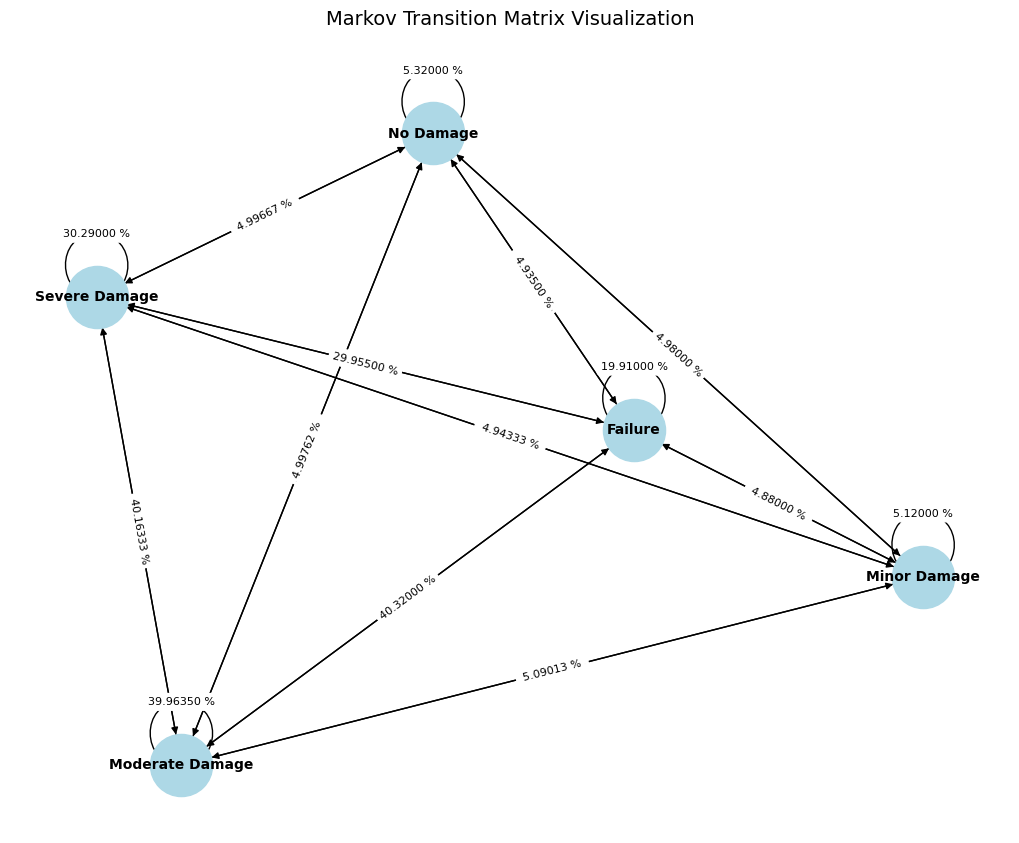

In [1]:
###########################################################################################################
#                                         IN THE NAME OF ALLAH                                            #
#                 ASSESSING STRUCTURAL DAMAGE RISKS THROUGH A MARKOV CHAIN MODEL                          #
#---------------------------------------------------------------------------------------------------------#
# THIS PYTHON SCRIPT EVALUATES STRUCTURAL DAMAGE PROGRESSION BY MODELING TRANSITIONS BETWEEN DIFFERENT    #
# DAMAGE STATES USING A MARKOV CHAIN APPROACH. IT ANALYZES DISPLACEMENT DATA CAUSED BY EXTERNAL FORCES    #
# (E.G., SEISMIC ACTIVITY) AND PROVIDES KEY INSIGHTS INTO THE BEHAVIOR OF STRUCTURES UNDER STRESS.        #
#                                                                                                         #
# KEY STEPS IN THE SCRIPT:                                                                                #
#                                                                                                         #
# 1. DATA GENERATION OR LOADING:                                                                          #
#    - GENERATES SYNTHETIC DISPLACEMENT DATA USING THE `BETA_PDF` FUNCTION OR LOADS REAL DATA FROM A FILE.#
#    - THE DISPLACEMENT DATA REPRESENTS STRUCTURAL MOVEMENT CAUSED BY EXTERNAL FORCES, SUCH AS EARTHQUAKES#
#                                                                                                         #
# 2. DAMAGE STATES:                                                                                       #
#    - DAMAGE LEVELS ARE DETERMINED BASED ON QUANTILES OF THE DISPLACEMENT DATA:                          #
#        - NO DAMAGE: 5TH PERCENTILE                                                                      #
#        - MINOR DAMAGE: 10TH PERCENTILE                                                                  #
#        - MODERATE DAMAGE: 50TH PERCENTILE                                                               #
#        - SEVERE DAMAGE: 80TH PERCENTILE                                                                 #
#    - ADDITIONAL STATES, LIKE "FAILURE," CAN BE INCLUDED BY ADJUSTING QUANTILES.                         #
#                                                                                                         #
# 3. STATE ASSIGNMENT:                                                                                    #
#    - EACH DISPLACEMENT VALUE IS CATEGORIZED INTO A DAMAGE STATE BASED ON THE DEFINED THRESHOLDS.        #
#                                                                                                         #
# 4. MARKOV TRANSITION MATRIX:                                                                            #
#    - A TRANSITION MATRIX IS CONSTRUCTED TO CAPTURE THE PROBABILITY OF MOVING BETWEEN DAMAGE STATES:     #
#        - ROWS REPRESENT THE CURRENT STATE.                                                              #
#        - COLUMNS REPRESENT THE NEXT STATE.                                                              #
#    - THE MATRIX IS NORMALIZED TO CONVERT COUNTS INTO PROBABILITIES.                                     #
#                                                                                                         #
# 5. VISUALIZATION:                                                                                       #
#    - A DIRECTED GRAPH IS GENERATED USING NETWORKX TO VISUALIZE TRANSITIONS:                             #
#        - NODES: REPRESENT DAMAGE STATES (E.G., NO DAMAGE, MINOR DAMAGE).                                #
#        - EDGES: REPRESENT TRANSITION PROBABILITIES, WITH THICKNESS AND LABELS INDICATING LIKELIHOOD.    #
#                                                                                                         #
# PRACTICAL OUTPUTS                                                                                       #
# - TRANSITION MATRIX: HIGHLIGHTS STRUCTURAL BEHAVIOR, SUCH AS THE LIKELIHOOD OF ESCALATING FROM          #
#   "MODERATE DAMAGE" TO "SEVERE DAMAGE."                                                                 #
# - GRAPH VISUALIZATION: OFFERS AN INTUITIVE VIEW OF SYSTEM DYNAMICS, EMPHASIZING DOMINANT TRANSITIONS.   #
#                                                                                                         #
# USE CASES                                                                                               #
# - ENGINEERING INSIGHTS: PREDICT DAMAGE PROGRESSION AND PLAN STRUCTURAL INTERVENTIONS.                   #
# - DISASTER MANAGEMENT: IDENTIFY AT-RISK STRUCTURES AND ALLOCATE RESOURCES EFFECTIVELY.                  #
#                                                                                                         #
#---------------------------------------------------------------------------------------------------------#
#                         PROGRAM WRITTEN BY SALAR DELAVAR GHASHGHAEI (QASHQAI)                           #
#                               EMAIL: SALAR.D.GHASHGHAEI@GMAIL.COM                                       #
###########################################################################################################

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#---------------------------------------------------------------
def BETA_PDF(MIN_X, MAX_X, a, b, n):
    return MIN_X + (MAX_X - MIN_X) * np.random.beta(a, b, n)
	
#---------------------------------------------------------------	
"""
This Python script performs a structural damage analysis by evaluating displacement data from an input file
 (or directly supplied data) and visualizing the results using a Markov Chain model. Below is a breakdown of each part of the code:

1. Input Data:
The script starts by reading displacement data from a text file or using directly provided data (`DATA`). The displacement data represents the movement of a structure, typically caused by external forces such as seismic activity (e.g., earthquakes). This data is assumed to be in a single column of numerical values.
- `np.loadtxt(file_path)` is used to read the data from a specified file (e.g., `Ground_Acceleration_1.txt`), or if no file is specified (`FILE_TF == False`), the script will use data directly supplied through the `DATA` parameter.
- This data represents measurements of structural displacements over time, which can vary depending on environmental or operational factors.

2. Quantile-Based Thresholds:
The script divides the displacement data into different levels of structural damage based on specific quantiles (percentiles). This quantile-based approach dynamically adapts to the distribution of the input data, making it flexible for various types of displacement datasets.
- Q1 (5th Percentile): Represents the "No Damage" state. This is the lowest 5% of the displacement values, indicating minimal movement and no noticeable damage to the structure.
- Q2 (10th Percentile): Represents the "Minor Damage" state. This range indicates slight deformations that may not affect structural integrity significantly.
- Q3 (50th Percentile): Represents the "Moderate Damage" state. This threshold captures noticeable deformations that could require repair.
- Q4 (80th Percentile): Represents the "Severe Damage" state. This range marks major deformations, suggesting serious structural problems.
- Q5 (95th Percentile): Represents the "Failure" state, where extreme displacement values indicate that the structure has reached or exceeded its capacity and is at risk of collapse.

These thresholds are determined using the `np.quantile()` function, which divides the data into quantile-based intervals. These quantile levels create a dynamic way to assess the severity of structural displacement based on the actual data.

3. Markov Transition Matrix:
Once the data is divided into states, the script calculates a Markov Transition Matrix, which represents the probabilities of transitions between the states over time.
- Transition Matrix: A matrix where each element \( P[i, j] \) represents the probability of transitioning from state `i` to state `j`. For example, it might show the probability of a structure staying in the "No Damage" state or progressing to "Minor Damage".
- Counting Transitions: The script counts how many times the structure transitions from one state to another by iterating over the displacement data and checking how the state changes from one time step to the next.
- Normalization: After counting the transitions, the matrix is normalized (i.e., transformed into probabilities) by dividing each row by its total sum. This ensures that the probabilities for each state sum to 1.

4. NetworkX Visualization:
To better understand the Markov Transition Matrix, the script visualizes it as a directed graph using NetworkX.
- Nodes: Represent the different states (e.g., "No Damage", "Minor Damage", etc.).
- Edges: Represent transitions between states. The thickness of the edges corresponds to the transition probability, and each edge is labeled with the exact transition probability in percentage form. 
- Spring Layout: The positions of the nodes are arranged using a spring layout to minimize edge overlaps and make the graph more readable. 
- Edge Labels: The edges are labeled with the transition probabilities in percentage format (e.g., "15.00000 %"), providing insight into the likelihood of each transition.

Key Observations in the Graph:
- Dominant Transitions: Transitions that occur frequently (like "No Damage → No Damage") will have thicker edges.
- Escalation Trends: If there is a strong probability of transitioning from a lower-damage state (like "Minor Damage") to a higher-damage state (like "Moderate Damage"), the graph will highlight these edges.
- Recovery Trends: If the data indicates any recovery (e.g., transitioning from "Severe Damage" to "Moderate Damage"), these edges will also be visualized.



5. Practical Implications:
The output provides valuable insights for engineers and disaster response teams:
- Engineering Insight: By understanding how likely different damage states are, engineers can predict how the structure will behave under continuous stress or seismic activity. If a structure has a high probability of moving from "Severe Damage" to "Failure", it suggests that immediate intervention is needed. 
- Disaster Response: By analyzing the transition matrix and visualizing the critical thresholds, teams can prepare for rapid escalation in damage. This can assist in resource allocation and focus efforts on the most at-risk structures.
- Structural Design: If designers understand the transition probabilities, they can take steps to enhance resilience in areas where damage escalation is likely (e.g., increasing reinforcement in sections of a building that are more likely to experience higher displacement).



6. Limitations:
While this approach provides valuable insights, there are some inherent limitations:
- Static Data: The model assumes that transition probabilities remain constant over time, which may not be realistic in dynamic, real-world scenarios where factors such as fatigue, repair, or additional stresses can change the system's behavior. 
- Dataset Dependency: The results depend heavily on the quality and size of the input data (`Ground_Acceleration_1.txt`). A small or biased dataset may lead to misleading conclusions.
- Simplified States: The model simplifies a complex phenomenon (structural behavior) into discrete states. This simplification may overlook nuanced behaviors that occur in between these states, making the model less precise in capturing the full complexity of structural dynamics.

In summary, this script models the transition of a structure between different damage states under stress using a Markov chain and provides a visual representation of the probabilities for each state transition. This can help in structural assessment, disaster management, and design improvements, although it does make certain assumptions that may not always apply in real-world cases.
"""
def MARKOV_CHAIN(FILE_TF, file_path, DATA):
    # Load the displacement data from the provided text file
    if FILE_TF == True:
        data = np.loadtxt(file_path)  # Ensure the file contains a single column of values (displacement, velocity, acceleration, base-reaction)
    if FILE_TF == False:
        data = DATA    #  (displacement, velocity, acceleration, base-reaction)
    # Define state boundaries based on quantiles
    Q1 = np.quantile(data, 0.05)  # No Damage Level (You can use your own parameter for example lateral dirft and damge index level)
    Q2 = np.quantile(data, 0.10)  # Minor Damage Level
    Q3 = np.quantile(data, 0.50)  # Moderate Damage Level
    Q4 = np.quantile(data, 0.80)  # Severe Damage Level
    #Q5 = np.quantile(data, 0.95)  # Failure Level

    # Define critical thresholds and labels for states
    state_limits = [Q1, Q2, Q3, Q4]  # Critical thresholds for damage levels
    state_labels = ["No Damage", "Minor Damage", "Moderate Damage", "Severe Damage", "Failure"]
    num_states = len(state_limits) + 1  # Total number of states (thresholds + 1)

    # Function to determine the state of a sample based on displacement
    def get_state(value, limits):
        """
        Determines the state index based on the input value and the state limits.
        :param value: The displacement or data point to evaluate.
        :param limits: A list of thresholds defining state boundaries.
        :return: The state index (0 to len(limits)).
        """
        for i, limit in enumerate(limits):
            if value <= limit:
                return i  # Return the corresponding state index
        return len(limits)  # If the value exceeds all limits, assign to the last state

    # Map each displacement value in the data to a state
    states = [get_state(disp, state_limits) for disp in data]

    # Initialize the Markov transition matrix with zeros
    transition_matrix = np.zeros((num_states, num_states))

    # Count transitions between states
    for i in range(len(states) - 1):
        transition_matrix[states[i], states[i + 1]] += 1

    # Normalize the transition matrix to represent probabilities
    row_sums = transition_matrix.sum(axis=1, keepdims=True)  # Calculate the sum of each row
    transition_matrix = np.divide(transition_matrix, row_sums, where=row_sums != 0)  # Normalize rows where sum is not zero

    # Print the Markov Transition Matrix
    print("Markov Transition Matrix:")
    print(transition_matrix)

    # Visualize the transition matrix using NetworkX
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges with weights based on transition probabilities
    for i in range(num_states):
        for j in range(num_states):
            if transition_matrix[i, j] > 0:  # Add edges only if the probability is non-zero
                G.add_edge(state_labels[i], state_labels[j], weight=transition_matrix[i, j])

    # Define positions for better layout
    pos = nx.spring_layout(G, seed=42)  # Spring layout for visualization

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(
        G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold"
    )

    # Draw edge labels with probabilities
    edge_labels = {
        (u, v): f"{d['weight']*100:.5f} %" for u, v, d in G.edges(data=True)
    }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    # Title and display the graph
    plt.title("Markov Transition Matrix Visualization", fontsize=14)
    plt.show()
	
#---------------------------------------------------------------
# GENERATE DATA
DATA = BETA_PDF(10, 20, 2.1, 2.5, 100000) # For example lateral dirft or damge index level

# MARKOV CHAIN MODEl (structural damage analysis by evaluating displacement)
FILE_TF = False         # Indicate whether to read data from a file or use provided data
file_path = None        # Not used when 'file_tf' is False

MARKOV_CHAIN(FILE_TF, file_path, DATA)
#---------------------------------------------------------------